In [1]:
from scimath.units.length import meters as m
from scimath.units.length import kilometers as km
from scimath.units.length import light_year as ly
from scimath.units.mass import kilograms as kg
from scimath.units.time import seconds as s
from scimath.units.time import years as yr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.constants import G, c, solar_mass, g
from src.utils import v_escape_solar
from src.engine import Engine
from src.starship import Starship
%matplotlib inline

## Example: Simple Mission

This example mission has a single acceleration phase and a single deceleration phase at the destination

In [2]:
eng = {'main': Engine(1000.0 * kg)}
ss = Starship(1.0 * kg, eng)
ss.wait(10 * yr)
ti = ss.time
ss.accelerate(fuel_mass = 900 * kg)
t_accel = ss.time
ss.cruise(ss.destination_distance)
ss.accelerate(decelerate=True)
ss.wait(10 * yr)
ss.print_history()




{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.0 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 10.0 - Acceleration: 1.0 g for 3.70e-03 years.  New velocity is 3.83e-03 c.  1.00e+02 kg of fuel remaining.
{'time': 315809805.7352165*s, 'position': 67033105631.93772*m, 'velocity': 1146817.1312369807*m*s**-1, 'fuel_mass': 100.0*kg}

year 10.0 - Cruise: 1.11e+03 years to complete. Distance=4.24e+00 lightyears
{'time': 35324216034.10684*s, 'position': 4.014830703310563e+16*m, 'velocity': 1146817.1312369807*m*s**-1, 'fuel_mass': 100.0*kg}

year 1119.4 - Acceleration: 1.0 g for 3.70e-03 years.  New velocity is 0.00e+00 c.  9.19e+00 kg of fuel remaining.
{'time': 35324332936.97445*s, 'position': 4.014837406621126e+16*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 9.19080919080919*kg}

year 1119.4 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears

<ipython-input-3-1c9e92bbb860>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


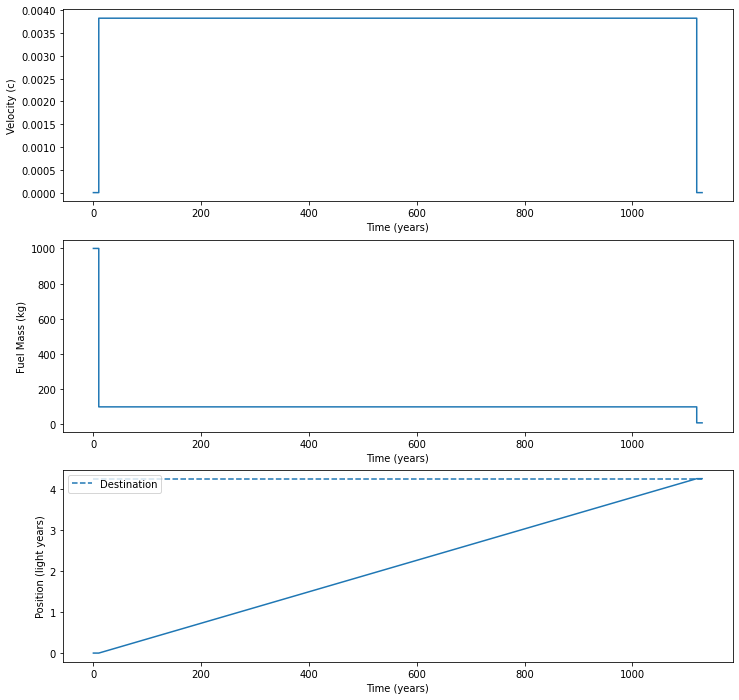

In [3]:
fig = ss.plot_history()
fig.show()

In [4]:
fig.savefig('../images/proxima_centauri.png')

## Example: Aborted mission

In this mission, the crew decides to abort the mission at the half-way point and return to the destination.

In [5]:
eng = {'main': Engine(1000.0 * kg)}
ss = Starship(1.0 * kg, eng)
ss.wait(10 * yr)
ss.accelerate(fuel_mass = 900 * kg)
ss.cruise(ss.destination_distance / 2)
ss.accelerate(decelerate=True)
ss.accelerate(fuel_mass = ss.fuel_mass(), decelerate=True)
ss.cruise(ss.destination_distance / 2)
ss.wait(10 * yr)
ss.print_history()



{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.0 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 10.0 - Acceleration: 1.0 g for 3.70e-03 years.  New velocity is 3.83e-03 c.  1.00e+02 kg of fuel remaining.
{'time': 315809805.7352165*s, 'position': 67033105631.93772*m, 'velocity': 1146817.1312369807*m*s**-1, 'fuel_mass': 100.0*kg}

year 10.0 - Cruise: 5.55e+02 years to complete. Distance=2.12e+00 lightyears
{'time': 17820012919.921032*s, 'position': 2.007418703310563e+16*m, 'velocity': 1146817.1312369807*m*s**-1, 'fuel_mass': 100.0*kg}

year 564.7 - Acceleration: 1.0 g for 3.70e-03 years.  New velocity is 0.00e+00 c.  9.19e+00 kg of fuel remaining.
{'time': 17820129822.78864*s, 'position': 2.0074254066211264e+16*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 9.19080919080919*kg}

year 564.7 - Acceleration: 1.0 g for 3.75e-03 years.  New velocit

<ipython-input-6-1c9e92bbb860>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


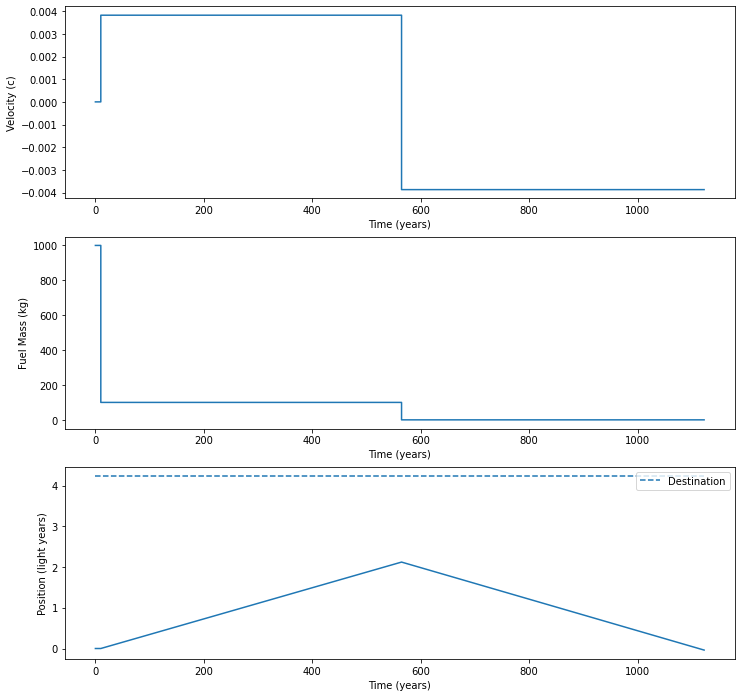

In [6]:
fig = ss.plot_history()
fig.show()

In [7]:
fig.savefig('../images/proxima_centauri_aborted.png')